In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sites = pd.read_csv('sites.csv')
sites.head()

,Site Name,Address,City,State,ZIP,latitude,longitude,Number of Visits in 2019,Average Demand per Visit,StDev(Demand per Visit)
0,MFP American Legion - Binghamton,177 Robinson St,Binghamton,NY,13904,42.108036,-75.887779,11,200.2,46.1
1,MFP Avoca,United Methodist Church,Avoca,NY,14809,42.417447,-77.435843,12,314.6,57.3
2,MFP Bath,St Thomas Church,Bath,NY,14810,42.336217,-77.317505,11,279.5,45.3
3,MFP Beaver Dams,Grace Lee Wesleyan Church,Beaver Dams,NY,14812,42.260641,-76.955986,10,170.7,28.8
4,MFP Birnie Transportation Services,124 Victory Hwy,Painted Post,NY,14870,42.172309,-77.110122,8,213.4,53.4


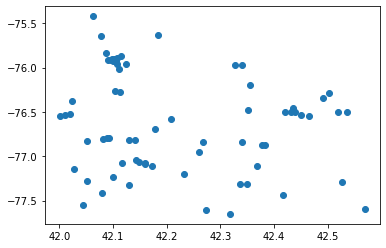

In [5]:
plt.scatter(sites[['latitude']], sites['longitude'])